#DESCRIPTION 

---
The dataset contains transactions made by credit cards in September 2013 by European cardholders. It contains only numerical input variables except 'Time' and 'Amount' columns. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. 

Also the dataset is highly unbalanced, so for that we have done RandomOverSampler method. Feature ‘Class’ is the response variable with 1 as fraud, otherwise 0.

V14 is the most important feature.

In [1]:
#Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#To load dataset of credit card
cr = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

#To show any 10 records
cr.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
72089,54560.0,1.230651,0.072275,0.630516,0.627844,-0.863898,-1.233341,-0.089981,-0.094896,0.371201,...,-0.354108,-1.156822,0.267817,0.649460,-0.012775,0.088523,-0.050297,0.018964,5.28,0
263262,160866.0,-0.651464,0.826809,2.998547,4.267219,0.057609,1.795672,-0.276750,0.371962,-1.076032,...,0.163761,0.636646,-0.165448,0.453399,0.039956,0.515957,0.203610,-0.038225,61.57,0
34374,37642.0,-0.567473,1.015081,0.821443,1.056816,-0.172657,1.125389,-0.476132,-0.084570,0.341793,...,0.757389,0.018440,-0.040400,-0.867727,-0.041191,-0.207114,0.062958,-0.022917,19.88,0
58038,48201.0,-0.820112,-0.335657,1.411853,-0.666699,-1.006461,0.731439,-1.097363,-2.451148,0.211354,...,-1.329703,-0.182392,-0.313302,0.104110,0.765455,0.851666,-0.067083,0.223877,241.57,0
30482,35948.0,-0.139378,-2.247452,0.453494,1.959580,-1.756355,-0.055799,0.226418,-0.014518,0.884553,...,0.514059,0.041536,-0.663647,0.404267,0.202755,-0.309346,-0.070511,0.150103,681.00,0
108256,70826.0,-0.353348,1.004096,0.964357,-0.416580,0.846590,0.382382,0.625771,0.133658,-0.378794,...,-0.287785,-0.696541,-0.176209,-1.333506,-0.063934,0.186082,0.283952,0.104314,0.89,0
55535,46994.0,1.243343,-0.032984,0.071236,-0.014922,-0.486882,-1.090896,0.088165,-0.137771,0.259184,...,-0.049789,-0.159743,0.053465,0.435034,0.258157,1.055165,-0.096582,-0.007528,8.48,0
23250,32657.0,-0.752597,1.238772,0.933373,-0.268709,0.012924,-0.216609,0.269546,0.534421,-0.820193,...,-0.172792,-0.597178,-0.053214,-0.370411,-0.096430,0.097756,0.134943,0.042573,9.42,0
192116,129546.0,1.996609,-0.173944,-3.204922,-0.590223,2.669847,3.016909,-0.349747,0.718768,0.437151,...,0.207881,0.599277,-0.002351,0.638088,0.280388,-0.083117,0.011990,-0.033505,28.00,0
279571,168956.0,0.053191,1.195857,1.250172,3.542762,0.475307,0.251899,0.584807,0.076219,-1.476496,...,0.117790,0.335990,0.038994,-0.056480,-0.626482,0.004346,0.105507,0.090112,21.08,0


In [3]:
#To check number of rows and columns 
cr.shape

(284807, 31)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


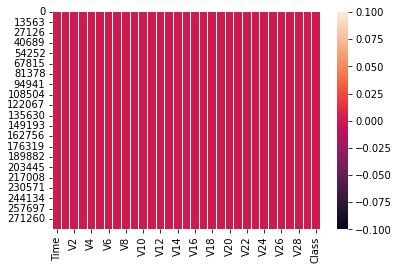

In [4]:
#To check null values
print(cr.isnull().sum())

#Visualise 
sns.heatmap(cr.isnull())
plt.show()

In [5]:
#Check datatypes
cr.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
#To check number of categories of Class column
cr["Class"].unique()

array([0, 1])

In [7]:
#Select input and output from credit card dataset
X = cr.drop("Class", axis = 1)
Y = cr["Class"]

In [8]:
#Splitting data into 70% and 30%
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [9]:
#Apply Standard Scaling  on 70% input Training data and 30% input Testing data
from sklearn.preprocessing import StandardScaler

#Create object of StandardScaler class
ss = StandardScaler()
X_train = ss.fit_transform(X_train)  
X_test = ss.transform(X_test)

0    284315
1       492
Name: Class, dtype: int64


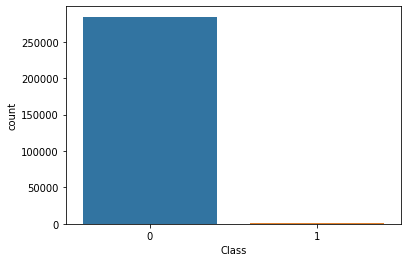

In [10]:
#To check data is balanced or not 
#To predict the output of Class
print(cr['Class'].value_counts())

#Visualise
sns.countplot(cr["Class"])
plt.show()

In [11]:
#Here, it shows that the data is unbalanced means there's a huge difference between 0 and 1

In [12]:
#Data is unbalanced, so use Sampling Technique
#Use RandomOverSampling technique
from imblearn.over_sampling import RandomOverSampler

#Create object of RandomOverSampling class
ros = RandomOverSampler()

In [13]:
#Apply RandomOverSampler on 70% Training data
X_train_ros, Y_train_ros = ros.fit_resample(X_train, Y_train)
#fit_resample() is the inbuilt method of RandomOverSampler class

In [14]:
#Check sample of output
#Before balance check when it not balanced
pd.Series(Y_train).value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [15]:
#After balancing the data
pd.Series(Y_train_ros).value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [16]:
#Apply RandomOverSampler on 30% Testing data
X_test_ros, Y_test_ros = ros.fit_resample(X_test, Y_test)

In [17]:
#Before balance check 
pd.Series(Y_test).value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [18]:
#After balancing the data
pd.Series(Y_test_ros).value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [19]:
#Create a user defined function
def create_model (model) : 
  model.fit(X_train_ros, Y_train_ros)    #Train the model with 70% data
  Y_pred = model.predict(X_test_ros)     #Test the model with 30% data
  print(classification_report(Y_test_ros, Y_pred))
  print(confusion_matrix(Y_test_ros, Y_pred))
  return model

In [20]:
#Call class for Evaluation score
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
#Apply Naive Bayes Theorem
#Here, all the inputs are continuous numerical value and output is Yes/No to predict then only we are applying Naive Bayes Theorem
#Perform Gaussian NaiveBayes Theorem
from sklearn.naive_bayes import GaussianNB

In [22]:
#Create object of GaussianNB
gb = GaussianNB()

In [23]:
#Call function (Train the model)
gb = create_model(gb)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     85308
           1       0.97      0.82      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

[[83199  2109]
 [14999 70309]]


In [24]:
#Base line model : Logistic Regression
from sklearn.linear_model import LogisticRegression

#Create object of LogisticRegression class
lr = LogisticRegression()

In [25]:
#Call function
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

[[83718  1590]
 [ 8829 76479]]


In [26]:
#Perform a Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Create object of DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 1)   #by default gini index
#by default Gini index : 1 - P(Yes)^2 - Q(No)^2

In [27]:
#Call function
dt = create_model(dt)
#reason behind less score : overfit

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     85308
           1       1.00      0.66      0.80     85308

    accuracy                           0.83    170616
   macro avg       0.87      0.83      0.83    170616
weighted avg       0.87      0.83      0.83    170616

[[85281    27]
 [28880 56428]]


In [28]:
#Sorting values and check the Information Gain of each values
IG = dt.feature_importances_
cols = X.columns

#Create a dictionary
dic = {"Input_X" : cols, "Information_Gain" : IG}
df = pd.DataFrame(dic)
df.sort_values("Information_Gain", ascending = False)  #descending order sorted

,Input_X,Information_Gain
14,V14,0.747254
4,V4,0.043783
10,V10,0.039604
12,V12,0.024457
20,V20,0.019426
5,V5,0.017224
0,Time,0.012793
7,V7,0.011550
29,Amount,0.010844
13,V13,0.010802


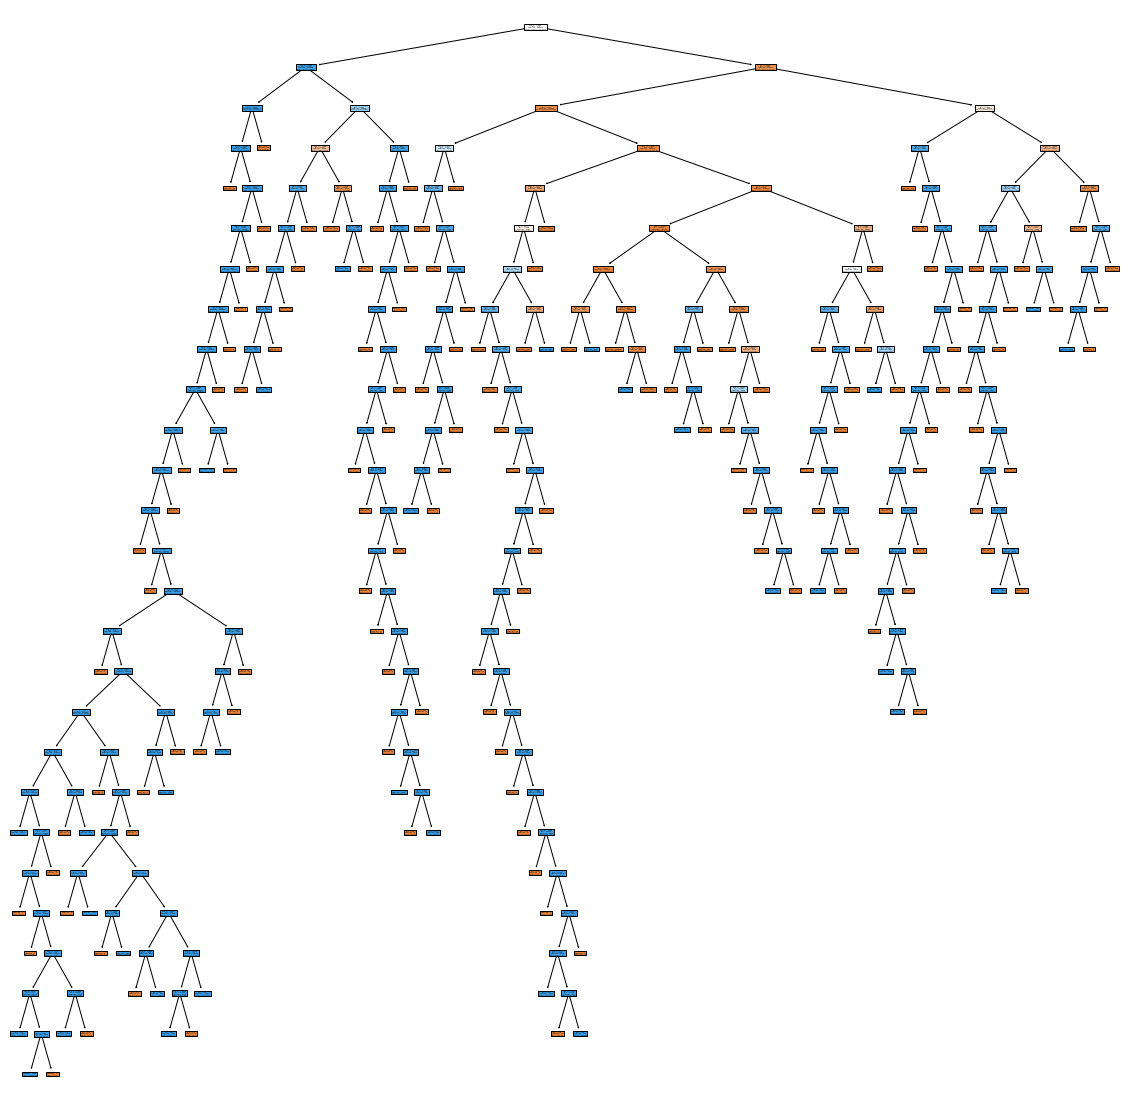

In [29]:
#Create a Tree
from sklearn import tree
plt.figure(figsize = (20, 20))
features = X.columns
_ = tree.plot_tree(dt, feature_names = features, filled = True)

In [30]:
#Apply Pruning technique to reduce overfitting
#max_depth : inbuilt parameter
#formula : 1 - P(Yes)^2 - Q(No)^2
dt1 = DecisionTreeClassifier(max_depth = 3, random_state = 1)
#max_depth must be less than 8
#by default Gini index

In [31]:
#Call function
dt1 = create_model(dt1)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     85308
           1       0.98      0.85      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

[[83524  1784]
 [12513 72795]]


In [32]:
#Sorting Values and check the Information Gain of each values
IG = dt1.feature_importances_ 
dic = {"Input_X" : cols, "Information_Gain" : IG}
df1 = pd.DataFrame(dic)
df1.sort_values("Information_Gain", ascending = False)

,Input_X,Information_Gain
14,V14,0.891971
4,V4,0.050390
20,V20,0.021041
10,V10,0.018513
12,V12,0.018085
0,Time,0.000000
22,V22,0.000000
19,V19,0.000000
21,V21,0.000000
23,V23,0.000000


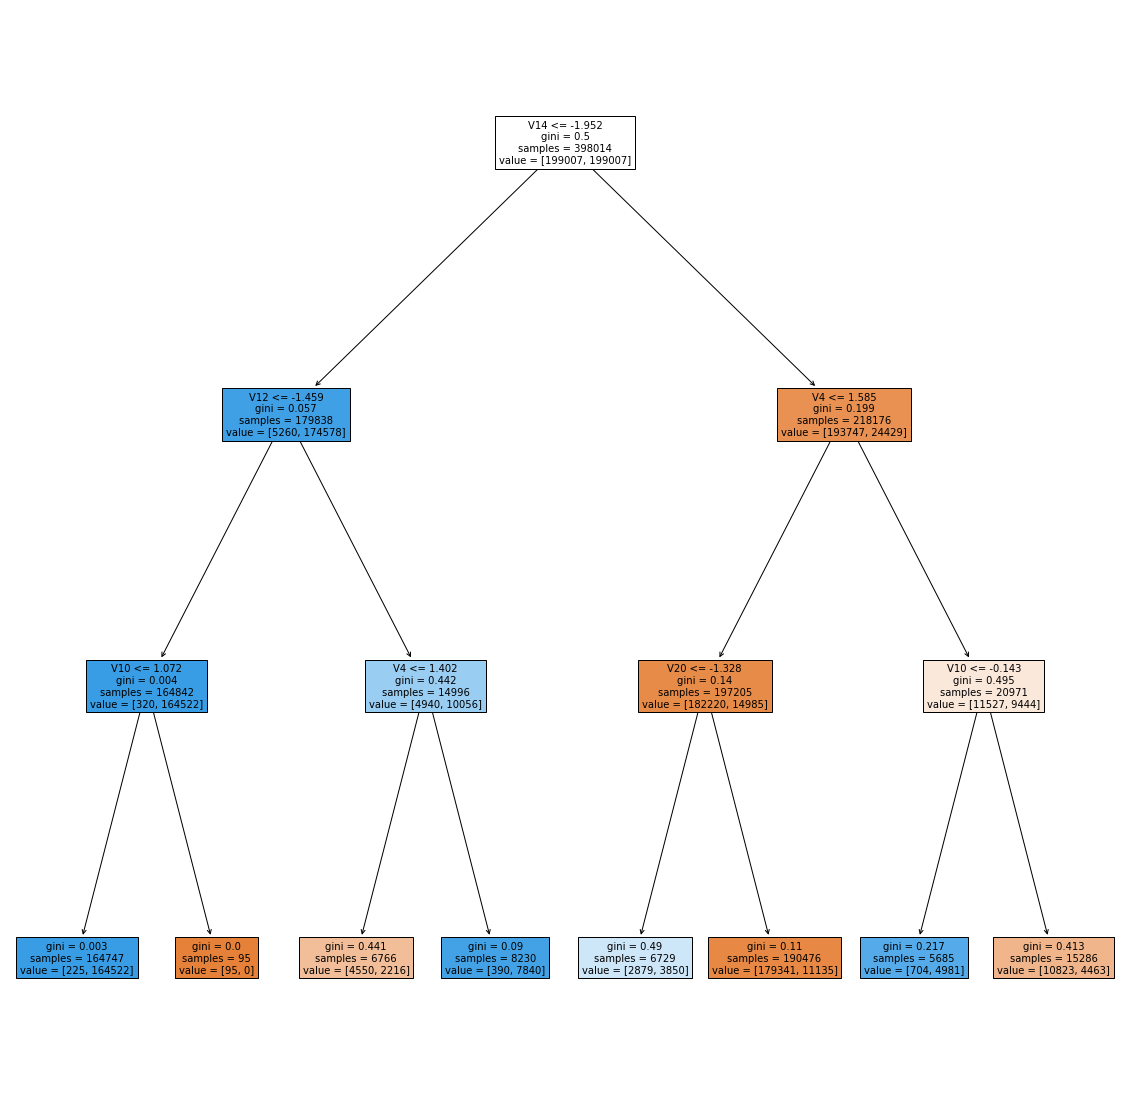

In [33]:
#Create a Tree
plt.figure(figsize = (20, 20))
_ = tree.plot_tree(dt1, feature_names = features, filled = True)

In [34]:
#Apply Pruning technique : min_samples_leaf
#min_samples_leaf must be more than 50

#Create object of DecisionTreeClassifier class
dt2 = DecisionTreeClassifier(min_samples_leaf = 60, random_state = 1)
#It will take those leaf in the tree which has no child.

In [35]:
#Call function
dt2 = create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      1.00      0.91     85308
           1       1.00      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

[[85050   258]
 [15585 69723]]


In [36]:
#Sorting values and check the Information Gain of each values
IG = dt2.feature_importances_
dic = {"Input_X" : cols, "Information_Gain" : IG}
df2 = pd.DataFrame(dic)
df2.sort_values("Information_Gain", ascending = False)   #descending order sort

,Input_X,Information_Gain
14,V14,7.503083e-01
4,V4,4.373312e-02
10,V10,3.966577e-02
12,V12,2.415222e-02
20,V20,1.933633e-02
5,V5,1.731313e-02
0,Time,1.282543e-02
7,V7,1.129147e-02
13,V13,1.122977e-02
29,Amount,1.096183e-02


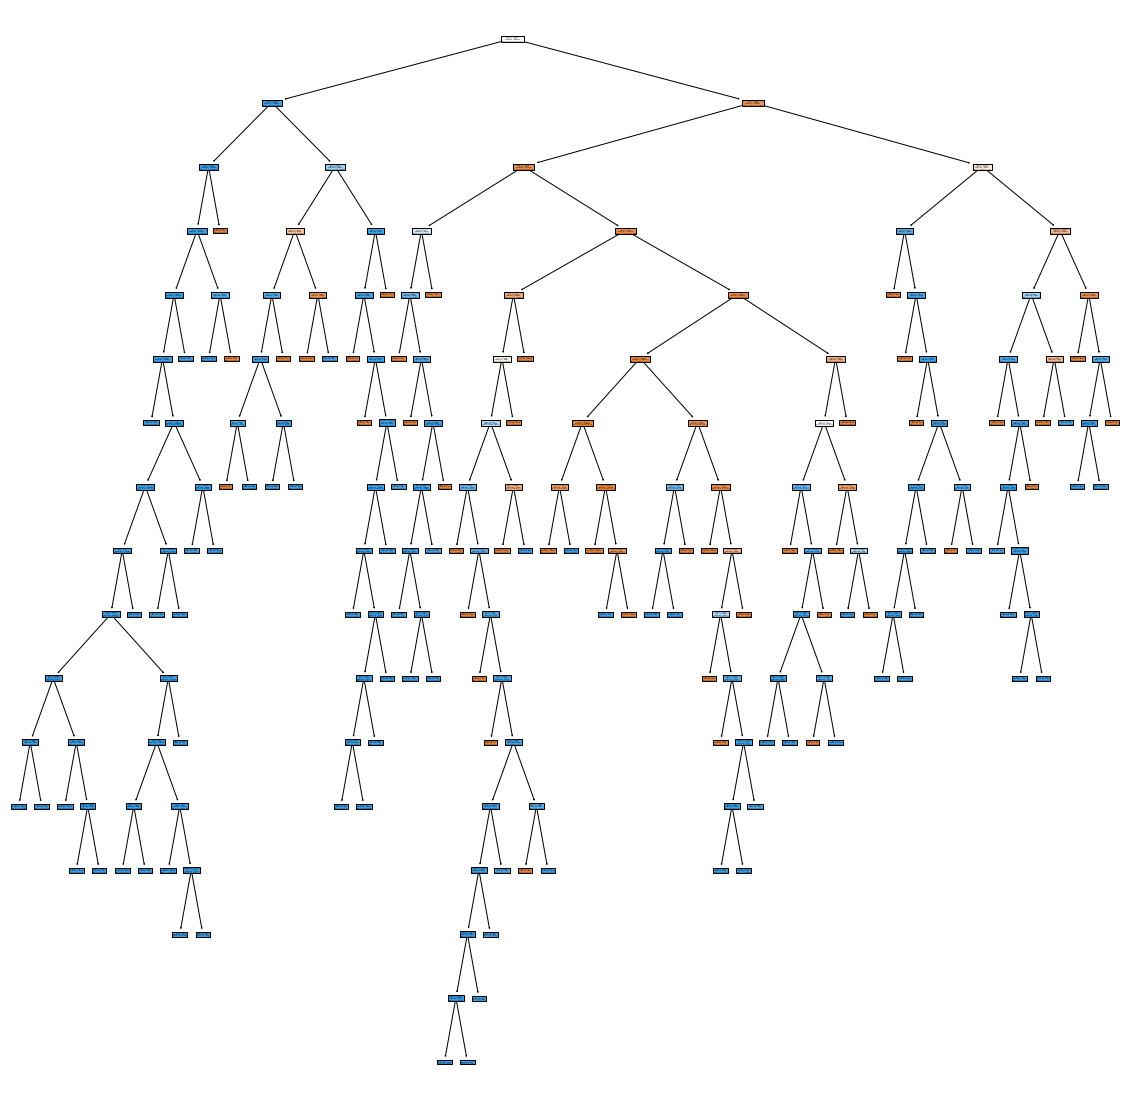

In [37]:
#Create a tree
plt.figure(figsize = (20,20))
_ = tree.plot_tree(dt2, feature_names = features, filled = True)

In [38]:
#CONCLUSION : -
#here, in this model Pruning technique of max_dept of Pruning technique is best because it shows the value of recall 0 and 1 proper

In [39]:
#Use Entropy method of decisiontree
#formula : -P(yes) * log2 P(yes) - P(no) * log2 (P(no))
#here, log 2 means base of log = 2

#Create object of DecisionTreeClassifier class
dt3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
#by default criterion = 'Gini index'

In [40]:
#Call function (train the model)
dt3 = create_model(dt3)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     85308
           1       0.97      0.85      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

[[82844  2464]
 [12486 72822]]


In [41]:
#Apply min_samples_leaf of Entropy method
#Create object of DecisionTreeClassifier class
dt4 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 70, random_state = 1)

In [42]:
#Call function (train the model)
dt4 = create_model(dt4)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

[[85056   252]
 [16786 68522]]


In [43]:
#Perform Ensembling Technique (Bootstraping method)
#Apply for Random Forest Tree
from sklearn.ensemble import RandomForestClassifier 

#Create object of RandomForestClassifier class
rfc = RandomForestClassifier(n_estimators = 10, max_features = 20, random_state = 1)
#n_estimators means no. of decisiontrees we take
#max_features should be less than inputs in the dataset

In [44]:
#Call function (train the model)
rfc = create_model(rfc)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     85308
           1       1.00      0.76      0.86     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.88    170616
weighted avg       0.90      0.88      0.88    170616

[[85293    15]
 [20522 64786]]


In [45]:
#CONCLUSION : 
#In this model, Decision Tree of max_dept of Pruning technique is the best

In [46]:
#Apply ADA Boosting on given dataset  (Boosting Technique)
from sklearn.ensemble import AdaBoostClassifier

#Create object of AdaBoostClassifierj class
ada = AdaBoostClassifier(n_estimators = 25, random_state = 1)
#n_estimators must be below 100

In [47]:
#Call function (train the model)
ada = create_model(ada)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     85308
           1       0.98      0.88      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

[[83534  1774]
 [10630 74678]]


In [48]:
#Apply Extreme Gradient Boosting (XGB) : (Boosting Technique)
#Call XGBClassifier class from the following package
from xgboost import XGBClassifier

#Create object of XGBClassifier class
xgb = XGBClassifier(n_estimators = 60, reg_alpha = 1, random_state = 1)
#automatic overfitting : reg means reguralisation and alpha means lambda : hyperparameter, and 1 means True
#n_estimators can be <= 100

In [49]:
#Call function
xgb = create_model(xgb)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     85308
           1       0.99      0.87      0.92     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

[[84602   706]
 [11304 74004]]


In [50]:
#Perform Support Vector Machine (SVM)
#Apply Linear kernel function of SVM 
#It means data are linearly separable with the help of straight line, it is known as decision boundary or hyperplane. Linear separable data means which we can easily separate the Yes/No class.
from sklearn.svm import LinearSVC

#Create object of LinearSVC class  (hard margin)
svc = LinearSVC(random_state = 1)

In [51]:
#Call function
svc = create_model(svc)
#reason behind less score : model is overfit

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

[[83893  1415]
 [10072 75236]]


In [52]:
#To reduce overfit situation (soft margin)
#add some error on Training time
#Create object of LinearSVC class
svc1 = LinearSVC(random_state = 1, C = 0.5)

#added some error on training time set error 0.1, 0.5, 0.7, 0.9 ...
#Value of parameter C should not be more than 1

In [53]:
#Call function
svc1 = create_model(svc1)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

[[83905  1403]
 [10072 75236]]


#CONCLUSION :
In this model, for the Credit Card Dataset AdaBoost method and Support Vector Machine method is the best to predict the output 'Class'.